In [1]:
import numpy as np
import geopandas as gp
import pandas as pd
import datetime as dt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# import .py scripts from repo
import json_to_csv
from json_to_csv import geojson_to_csv

import ts_train_test_split
from ts_train_test_split import uni_selection
from ts_train_test_split import single_split

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [2]:
from model_validation import model_val
from model_validation import predict_test

In [3]:
locations = pd.read_csv('Final_validation.csv', index_col=0)
locations

,lat,lon,Place,p,d,q,P,D,Q,filepath,MSE,r2
0,49.0362,-122.3247,"Abbotsford, Canada",1,0,8,2,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003737,0.563818
1,49.0362,-118.4245,"Grand Forks, Canada",1,0,0,1,0,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003181,0.631988
2,48.9289,-117.8306,"Northport, WA",1,0,2,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003246,0.732744
3,48.7835,-122.3357,"Dewey, WA",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
4,48.7826,-121.7994,"Mt. Baker, WA",4,0,6,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003416,0.611871
5,48.5767,-122.9509,"Shaw Island, WA",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
6,48.5085,-117.3252,"Rudy, WA",8,0,6,1,0,2,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003330,0.725801
7,48.4093,-123.5716,"Metchosin, Canada",7,0,5,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003064,0.662395
8,48.0139,-123.4453,"Port Angeles, WA",2,0,1,0,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003071,0.661566
9,47.9735,-122.2038,"Everett, WA",7,0,8,1,1,1,NASA/POWER_Point_Monthly_Timeseries_1981_2020_...,0.003160,0.607775


In [6]:
kelso_test, kelso_predict = predict_test(locations, sample=24)

In [12]:
def predict_vs_real(locations, sample):
    '''use pd.read_csv('Locations.csv') to access required data.
    Sample must be integer index of desired location.
    inputs hyperparameters and fits model with training set,
    predicts last 48 months, calculates MSE and r2 of predicted values
    against X_test (48 months)'''

    prediction = []
    geojson = locations['filepath'][sample]
    df = geojson_to_csv(geojson)
    X = uni_selection(df)
    X_train, X_test = single_split(X)
    X_train.index = pd.DatetimeIndex(X_train.index.values,
                                     freq=X_train.index.inferred_freq)
    (p, d, q) = (locations['p'][sample],
                 locations['d'][sample], locations['q'][sample])
    (P, D, Q, s) = (locations['P'][sample],
                    locations['D'][sample], locations['Q'][sample], 12)
    model = SARIMAX(X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(maxiter=50, method='powell', disp=False)
    predict = model_fit.get_prediction(start='2017-01-01', end='2020-12-01')

    prediction.append(predict.predicted_mean)
    predicted = pd.DataFrame(prediction)
    predicted = predicted.T
    MSE = mean_squared_error(X_test, predicted)
    r2 = r2_score(X_test, predicted)
    return X, predicted, r2


In [13]:
kelso_real, kelso_pred, r2 = predict_vs_real(locations, sample=24)

In [14]:
r2

0.589424226395314

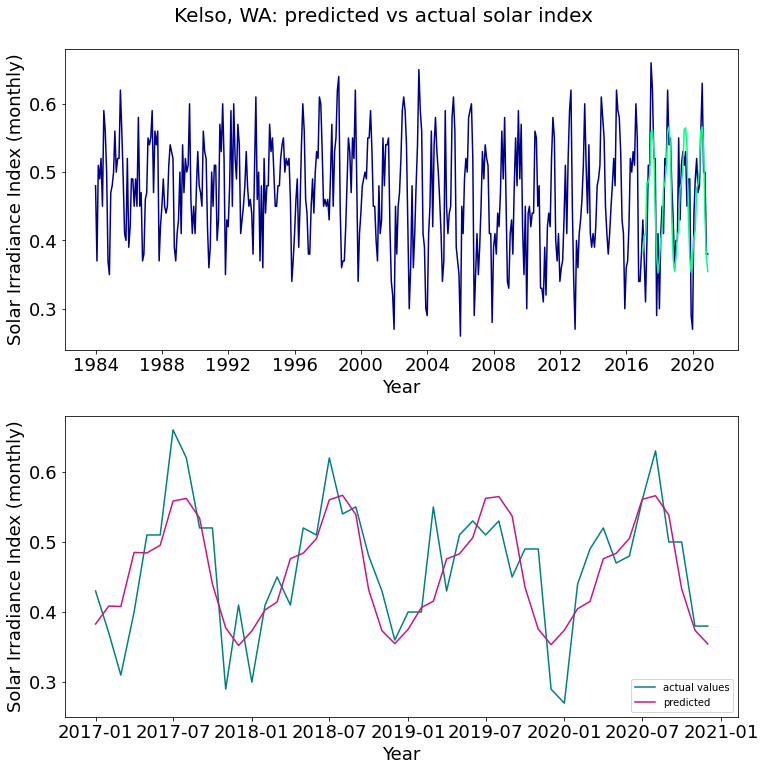

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(11,11))

plt.suptitle('Kelso, WA: predicted vs actual solar index', fontsize=20)
ax[0].plot(kelso_real, color='darkblue', label='dataset')
ax[0].plot(kelso_pred, color='springgreen', label='predicted')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Solar Irradiance Index (monthly)')

ax[1].plot(kelso_real[-48:], color='teal', label='actual values')
ax[1].plot(kelso_pred, color='mediumvioletred', label='predicted')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Solar Irradiance Index (monthly)')
ax[1].legend(loc='lower right', fontsize=10)

fig.tight_layout()

In [16]:
def replication(locations, sample):
    '''use pd.read_csv('Locations.csv') to access required data.
    Sample must be integer index of desired location.
    inputs hyperparameters and fits model with training set,
    predicts last 48 months, calculates MSE and r2 of predicted values
    against X_test (48 months)'''

    prediction = []
    geojson = locations['filepath'][sample]
    df = geojson_to_csv(geojson)
    Y = uni_selection(df)
    X = Y[:-48]
    X_train, X_test = single_split(X, test_size=36)
    print('X_train =', len(X_train), 'x_test =', len(X_test))
    X_train.index = pd.DatetimeIndex(X_train.index.values,
                                     freq=X_train.index.inferred_freq)
    (p, d, q) = (locations['p'][sample],
                 locations['d'][sample], locations['q'][sample])
    (P, D, Q, s) = (locations['P'][sample],
                    locations['D'][sample], locations['Q'][sample], 12)
    model = SARIMAX(X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(maxiter=50, method='powell', disp=False)
    predict = model_fit.get_prediction(start='2014-01-01', end='2016-12-01')

    prediction.append(predict.predicted_mean)
    predicted = pd.DataFrame(prediction)
    predicted = predicted.T
    MSE = mean_squared_error(X_test, predicted)
    r2 = r2_score(X_test, predicted)
    return X, predicted, r2

In [17]:
train, predict, r2 = replication(locations, sample=24)

X_train = 360 x_test = 36


In [18]:
r2

0.6213563837226472

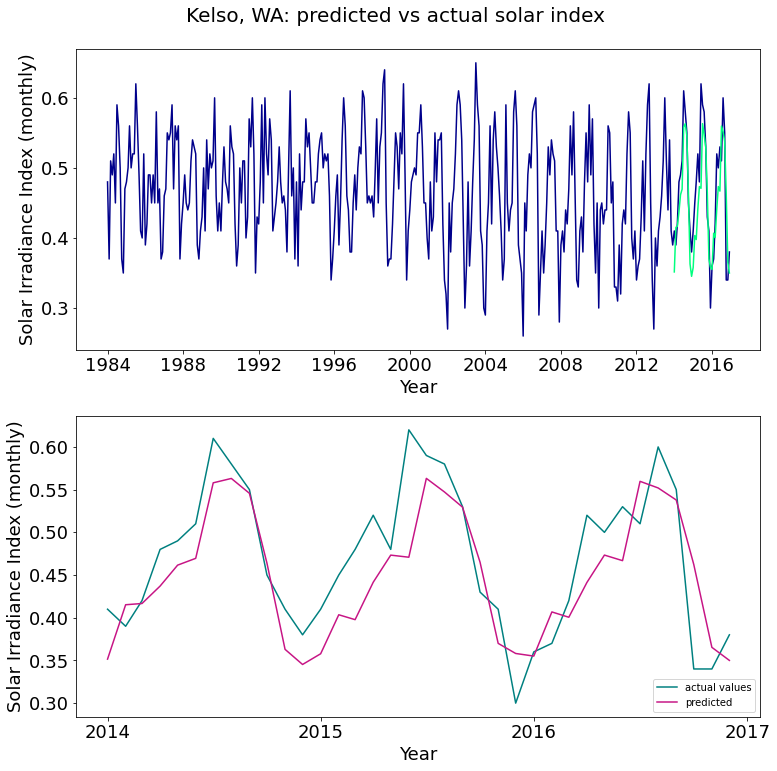

In [19]:
fig2, axes = plt.subplots(nrows=2, ncols=1, figsize=(11,11))

plt.suptitle('Kelso, WA: predicted vs actual solar index', fontsize=20)
axes[0].plot(train, color='darkblue', label='dataset')
axes[0].plot(predict, color='springgreen', label='predicted')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Solar Irradiance Index (monthly)')

axes[1].plot(train[-36:], color='teal', label='actual values')
axes[1].plot(predict, color='mediumvioletred', label='predicted')
axes[1].set_xlabel('Year')
axes[1].set_xticks(ticks=('2014-01', '2015-01', '2016-01', '2017-01'), labels=('2014', '2015', '2016', '2017'))
axes[1].set_ylabel('Solar Irradiance Index (monthly)')
axes[1].legend(loc='lower right', fontsize=10)

fig2.tight_layout()